<a href="https://colab.research.google.com/github/gokceoguzerenler/cis530_sp2021/blob/master/text_classification4_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def get_precision(y_pred, y_true):
    # Calculate Precision
    true_positives = sum([(1 if pred == 1 and true == 1 else 0) for pred, true in zip(y_pred, y_true)])
    false_positives = sum([(1 if pred == 1 and true == 0 else 0) for pred, true in zip(y_pred, y_true)])

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    return precision

def get_recall(y_pred, y_true):
    # Calculate Recall
    true_positives = sum([(1 if pred == 1 and true == 1 else 0) for pred, true in zip(y_pred, y_true)])
    false_negatives = sum([(1 if pred == 0 and true == 1 else 0) for pred, true in zip(y_pred, y_true)])

    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
    return recall

def get_fscore(y_pred, y_true):
    # Calculate F1-score
    precision = get_precision(y_pred, y_true)
    recall = get_recall(y_pred, y_true)

    fscore = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return fscore

def test_predictions(y_pred, y_true):
    # Print precision, recall, and f-score
    precision = get_precision(y_pred, y_true)
    recall = get_recall(y_pred, y_true)
    fscore = get_fscore(y_pred, y_true)

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {fscore:.4f}')

# Example usage
y_pred_example = [1, 0, 1, 1, 0]
y_true_example = [1, 1, 1, 0, 0]

test_predictions(y_pred_example, y_true_example)

Precision: 0.6667
Recall: 0.6667
F1-score: 0.6667


In [ ]:
def load_file(data_file):
    words = []
    labels = []
    with open(data_file, 'rt', encoding="utf8") as f:
        i = 0
        for line in f:
            if i > 0:
                line_split = line[:-1].split("\t")
                words.append(line_split[0].lower())
                labels.append(int(line_split[1]))
            i += 1
    return words, labels

def all_complex(data_file):
    # Load the data
    words, labels = load_file(data_file)

    # Predict all words as complex
    y_pred = [1] * len(labels)

    # Evaluate the baseline
    precision = get_precision(y_pred, labels)
    recall = get_recall(y_pred, labels)
    fscore = get_fscore(y_pred, labels)

    print(f'Majority Class Baseline - {data_file}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {fscore:.4f}')

    return precision, recall, fscore

# Evaluate on training data
all_complex_train = all_complex('train.txt')

# Evaluate on development data
all_complex_dev = all_complex('dev.txt')


Majority Class Baseline - train.txt
Precision: 0.4328
Recall: 1.0000
F1-score: 0.6041
Majority Class Baseline - dev.txt
Precision: 0.4180
Recall: 1.0000
F1-score: 0.5896


Word Length Baseline - dev.txt
Best Threshold: 7
Best F1-score: 0.7126


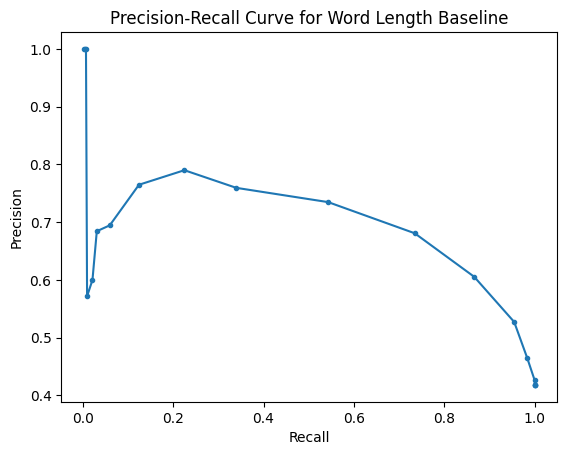

In [ ]:
from collections import defaultdict
import gzip
import matplotlib.pyplot as plt

def load_file(data_file):
    words = []
    labels = []
    with open(data_file, 'rt', encoding="utf8") as f:
        i = 0
        for line in f:
            if i > 0:
                line_split = line[:-1].split("\t")
                words.append(line_split[0].lower())
                labels.append(int(line_split[1]))
            i += 1
    return words, labels

def load_ngram_counts(ngram_counts_file):
   counts = defaultdict(int)
   with gzip.open(ngram_counts_file, 'rt') as f:
       for line in f:
           token, count = line.strip().split('\t')
           if token[0].islower():
               counts[token] = int(count)
   return counts

def word_length_threshold(training_file, development_file):
    # Load the data
    train_words, train_labels = load_file(training_file)
    dev_words, dev_labels = load_file(development_file)

    # Initialize variables to store the best threshold and corresponding scores
    best_threshold = 0
    best_fscore = 0

    # Try different thresholds
    for threshold in range(1, 20):
        # Predict words based on word length
        train_pred = [1 if len(word) >= threshold else 0 for word in train_words]
        dev_pred = [1 if len(word) >= threshold else 0 for word in dev_words]

        # Evaluate on development data
        fscore = get_fscore(dev_pred, dev_labels)

        # Check if this threshold gives a better F1-score
        if fscore > best_fscore:
            best_fscore = fscore
            best_threshold = threshold

    print(f'Word Length Baseline - {development_file}')
    print(f'Best Threshold: {best_threshold}')
    print(f'Best F1-score: {best_fscore:.4f}')

    # Plot Precision-Recall curve
    thresholds = range(1, 20)
    precisions = [get_precision([1 if len(word) >= t else 0 for word in dev_words], dev_labels) for t in thresholds]
    recalls = [get_recall([1 if len(word) >= t else 0 for word in dev_words], dev_labels) for t in thresholds]

    plt.plot(recalls, precisions, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Word Length Baseline')
    plt.show()

    return best_threshold, best_fscore

if __name__ == "__main__":
    training_file = "train.txt"
    development_file = "dev.txt"

    ngram_counts_file = "ngram_counts.txt.gz"
    counts = load_ngram_counts(ngram_counts_file)


# Evaluate on training and development data
word_length_train = word_length_threshold('train.txt', 'dev.txt')
